In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from kb import KnowledgeBase
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [141]:
class Dataset:
    def __init__(self, dataset):
        print(dataset.head())
        self.dataset = dataset
        _, self.cat_cols = self.categorical_columns()
        self.missingValues, self.categorical = self.check_ds()
       
    def missing_values(self):
        return (self.dataset.isnull().sum().sum())>0

    def fill_missing_values(self, col=[]):
        imp = IterativeImputer(max_iter=10, random_state=0)
        if (len(col)>1) and (len(col)<self.dataset.shape[1]):
            values_col = self.dataset.columns.difference(col)
            values_dataset = pd.DataFrame(imp.fit_transform(self.dataset[values_col]))
            values_dataset.columns = values_col
            values_dataset = pd.concat([self.dataset, values_dataset])
        elif len(col)<1:
            values_dataset = pd.DataFrame(imp.fit_transform(self.dataset))
        else:
            values_dataset = self.dataset
        return values_dataset
    
    def delete_missing_values(self):
        self.dataset = self.dataset.dropna()

    def fill_missing_cat(self, col):
        self.dataset = self.dataset.apply(lambda col: col.fillna(col.value_counts().index[0]))

    def zero_variance(self):
        var = self.dataset.std(axis=1)
        return (var==0).sum()>0

    def categorical_columns(self):
        cols = self.dataset.columns
        num_cols = self.dataset._get_numeric_data().columns
        return len(list(set(cols) - set(num_cols))) > 0, list(set(cols) - set(num_cols))

    def one_hot_encode(self):
        cols = self.dataset.columns
        num_cols = self.dataset._get_numeric_data().columns
        self.dataset = pd.get_dummies(self.dataset, columns=list(set(cols) - set(num_cols)))

    def curse_of_dim(self):
        data = StandardScaler().fit_transform(self.dataset)
        eucl = squareform(pdist(data.values))
        max_dist = eucl.max()
        min_dist = eucl[eucl.nonzero()].min()
        res = (max_dist-min_dist)/min_dist
        return res<1

    def dim_reduction(self):
        self.dataset = PCA(len(self.dataset.index)).fit_transform(self.dataset)

    def check_ds(self):
        missing_val = self.missing_values()
        categorical, cols = self.categorical_columns()
        #if missing_val and not categorical:
         #   self.dataset = self.fill_missing_values()
        #elif missing_val and categorical:
        #    self.fill_missing_cat(cols)
        #    self.dataset = self.fill_missing_values(cols)
        #zero_var = self.zero_variance()

        #if categorical:
        #   self.one_hot_encode()
        #curse_of_dim = self.curse_of_dim()
        #if curse_of_dim and not categorical:
         #   self.dim_reduction()

        return missing_val, categorical#, curse_of_dim


In [6]:
titanic = sns.load_dataset('titanic')
titanic_ds = Dataset(titanic)
print('titanic', titanic_ds.missingValues, titanic_ds.categorical)
print(titanic_ds.one_hot_encode())
print(titanic_ds.dataset.head())
print(titanic_ds.dataset.shape)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
titanic True True
None
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0       0.0     3.0  22.0    1.0    0.0   7.2500         1.0    0.0   
1       1.0     1.0  38.0    1.0    0.0  71.2833      

In [28]:
pca_data = titanic_ds.dataset.values
#pca = PCA(2)
#pca_data = pca.fit_transform(titanic_ds.dataset.values)
kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(pca_data)
labels = kmeans.fit_predict(pca_data)

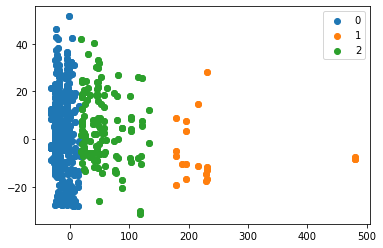

In [29]:
model =kmeans_fit
pca = PCA(2)
pca_data = pca.fit_transform(titanic_ds.dataset.values)
#pca_data = titanic_ds.dataset.values
#pca_data = kmeans_fit
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i)
plt.legend()
plt.show()

In [32]:
pca = PCA(2)
pca_data = pca.fit_transform(titanic_ds.dataset.values)

In [43]:
kmeans = KMeans(n_clusters=5)
kmeans_fit = kmeans.fit(pca_data)
labels = kmeans.fit_predict(pca_data)

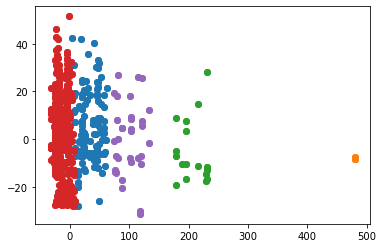

In [44]:
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i)

<Figure size 1152x1152 with 0 Axes>

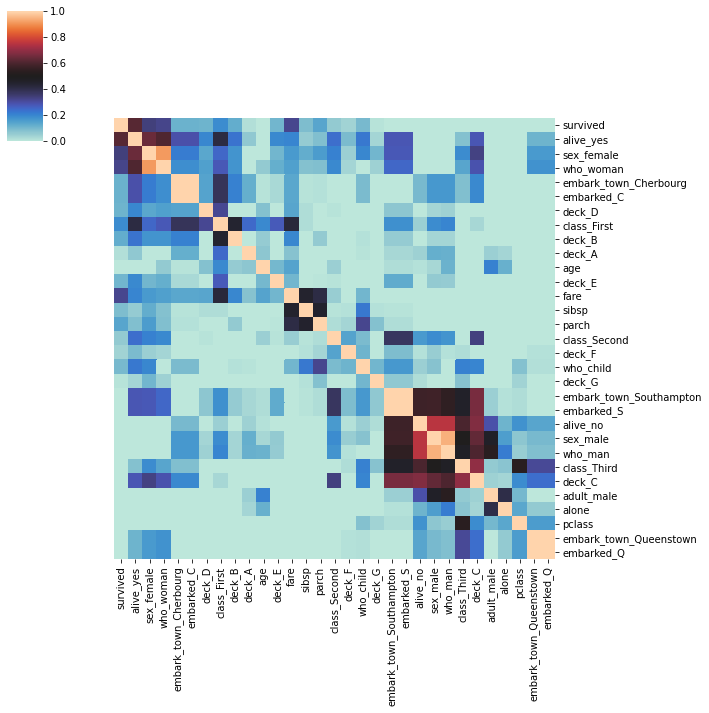

In [61]:
plt.figure(figsize = (16,16))
cg=sns.clustermap(titanic_ds.dataset.corr(method='spearman'),vmin=0,vmax=1,center=0.5)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

<Figure size 1152x1152 with 0 Axes>

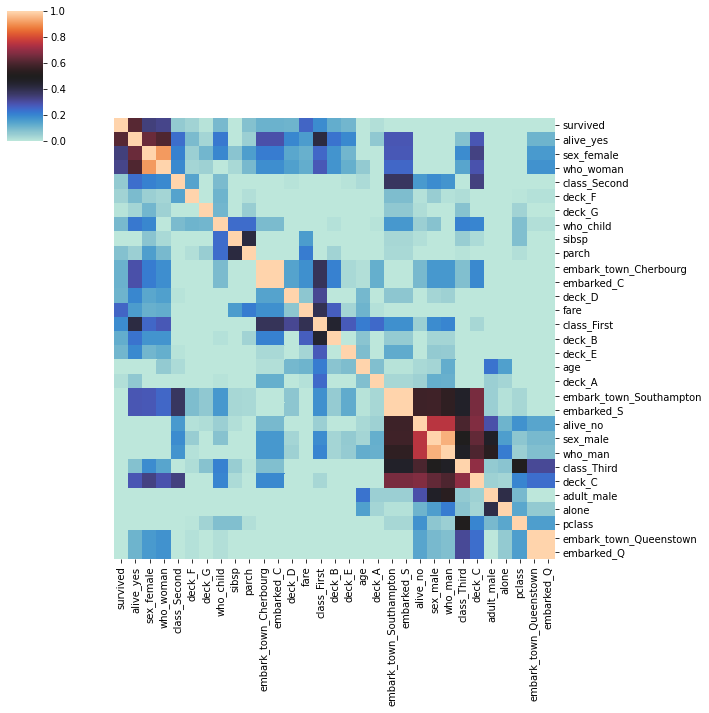

In [62]:
plt.figure(figsize = (16,16))
cg=sns.clustermap(titanic_ds.dataset.corr(method='pearson'),vmin=0,vmax=1,center=0.5)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

In [142]:
titanic = sns.load_dataset('titanic')
titanic_ds = Dataset(titanic)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [143]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [116]:
from mlxtend.frequent_patterns import apriori, association_rules
#titanic_ds.one_hot_encode()
#frq_items = apriori(titanic_ds.dataset, min_support = 0.05, use_colnames = True)

In [145]:
titanic_ds_cat = titanic_ds.dataset[[i for i in titanic_ds.cat_cols]]
tit_cat = titanic_ds_cat[['sex','embark_town','deck','embarked','alive']]
tit_cat = Dataset(tit_cat)

      sex  embark_town deck embarked alive
0    male  Southampton  NaN        S    no
1  female    Cherbourg    C        C   yes
2  female  Southampton  NaN        S   yes
3  female  Southampton    C        S   yes
4    male  Southampton  NaN        S    no


In [146]:
#titanic_ds.dataset[[i for i in titanic_ds.cat_cols]]

tit_cat.delete_missing_values()
tit_cat.one_hot_encode()

In [147]:
frq_items = apriori(tit_cat.dataset, min_support = 0.05, use_colnames = True, verbose=1)

Processing 6 combinations | Sampling itemset size 6


In [155]:
rules = association_rules(frq_items, metric="confidence", min_threshold=0.6)
rules[rules['antecedents'].apply(lambda x: len(x)>1)].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,"(embarked_C, sex_female)",(embark_town_Cherbourg),0.184080,0.343284,0.184080,1.000000,2.913043,0.120888,inf
28,"(embark_town_Cherbourg, sex_female)",(embarked_C),0.184080,0.343284,0.184080,1.000000,2.913043,0.120888,inf
29,"(embark_town_Cherbourg, sex_female)",(alive_yes),0.184080,0.666667,0.179104,0.972973,1.459459,0.056385,12.333333
30,"(embark_town_Cherbourg, alive_yes)",(sex_female),0.258706,0.472637,0.179104,0.692308,1.464777,0.056830,1.713930
31,"(embarked_S, sex_female)",(embark_town_Southampton),0.278607,0.636816,0.278607,1.000000,1.570312,0.101186,inf


In [154]:
len([len(i) for i in rules['antecedents']])

259